In [ ]:
! pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 41.8 MB/s eta 0:00:00


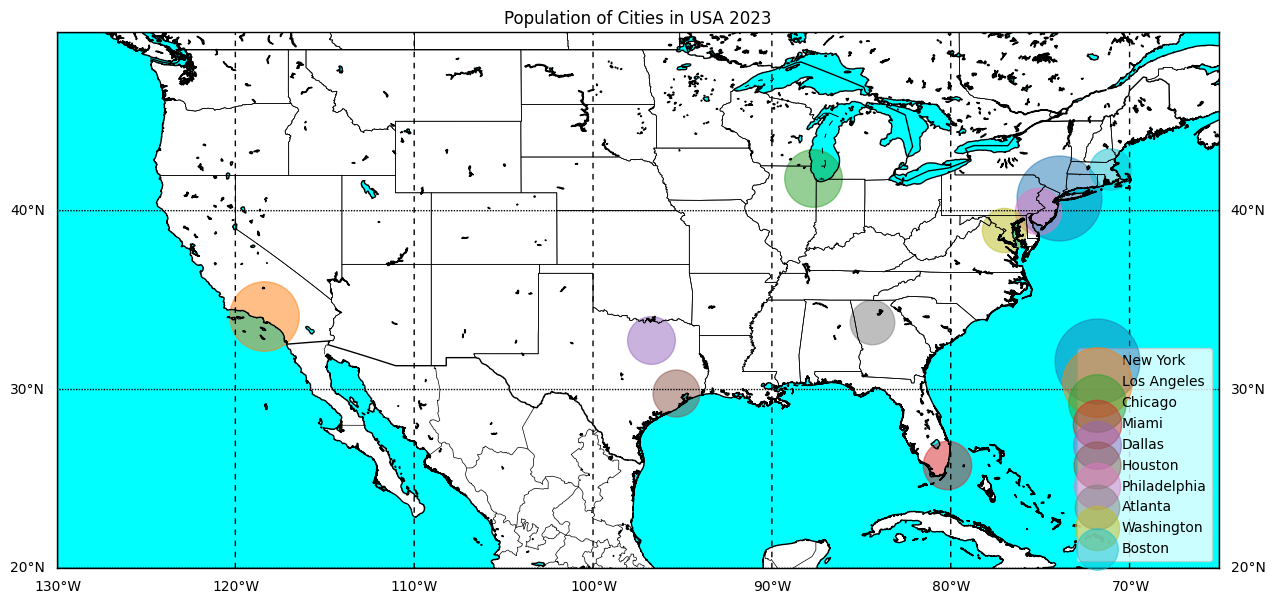

In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants for map projection
MIN_LON, MAX_LON = -130, -65
MIN_LAT, MAX_LAT = 20, 50

# Read the data from the CSV file
df = pd.read_csv("uscities.csv")

# Create a figure and Basemap
fig = plt.figure(figsize=(15, 15))
m = Basemap(
    llcrnrlon=MIN_LON,
    llcrnrlat=MIN_LAT,
    urcrnrlon=MAX_LON,
    urcrnrlat=MAX_LAT,
    rsphere=(6378137.00, 6356752.3142),
    resolution='h'
)

# Map settings
m.drawstates()
m.drawcoastlines()
m.drawcountries(linewidth=1.0, linestyle='solid', color='k')
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='white', lake_color='aqua')
m.drawparallels(np.arange(MIN_LAT, MAX_LAT, 10), labels=[1, 1, 0, 0])
m.drawmeridians(np.arange(MIN_LON, MAX_LON, 10), color='k', linewidth=1.0, dashes=[4, 4], labels=[0, 0, 0, 1])

# Plot the cities on the map
for i in range(10):
    city = df["city"].iloc[i]
    population = df["population"].iloc[i]
    lng = df["lng"].iloc[i]
    lat = df["lat"].iloc[i]
    marker_size = population / 5000
    m.scatter(lng, lat, label=city, s=marker_size, alpha=0.5)

# Add legend
plt.legend(loc='lower right')

# Set the title
plt.title("Population of Cities in USA 2023")

# Show the map
plt.show()